<a href="https://colab.research.google.com/github/sawyerhunt12/AB-Testing-Project/blob/main/AB_testing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questions:
1. Was the test campaign successful in driving more website traffic and sales?
2. Are the two campaigns statistically different?
3. Is day of the week a significant factor between the two campaigns?

Null hypothesis: The two campaigns generate an equal amount of revenue.

Alternative hypothesis: The two campaigns are significantly different, and the test campaign generates more revenue than the control campaign.

In [ ]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Source of data: https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset?select=control_group.csv

In [ ]:
# Read in control and testing data
control_df = pd.read_csv('control_group.csv', sep = ';')
test_df = pd.read_csv('test_group.csv', sep = ';')

In [ ]:
# Quick look at both data sets
print(control_df.head())
print(test_df.head())

      Campaign Name       Date  Spend [USD]  # of Impressions     Reach  \
0  Control Campaign  1.08.2019         2280           82702.0   56930.0   
1  Control Campaign  2.08.2019         1757          121040.0  102513.0   
2  Control Campaign  3.08.2019         2343          131711.0  110862.0   
3  Control Campaign  4.08.2019         1940           72878.0   61235.0   
4  Control Campaign  5.08.2019         1835               NaN       NaN   

   # of Website Clicks  # of Searches  # of View Content  # of Add to Cart  \
0               7016.0         2290.0             2159.0            1819.0   
1               8110.0         2033.0             1841.0            1219.0   
2               6508.0         1737.0             1549.0            1134.0   
3               3065.0         1042.0              982.0            1183.0   
4                  NaN            NaN                NaN               NaN   

   # of Purchase  
0          618.0  
1          511.0  
2          372.0  
3   

In [ ]:
# Check for null values in control data
control_df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [ ]:
# Drop null values in control data
control_df.dropna(inplace = True)

In [ ]:
# Check to see if null values were dropped in control data
control_df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [ ]:
# Check for null values in test data
test_df.isnull().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [ ]:
# Check for duplicates in control data
control_df.duplicated().sum()

0

In [ ]:
# Check for duplicates in test data
test_df.duplicated().sum()

0

In [ ]:
control_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [ ]:
test_df.columns

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase'],
      dtype='object')

In [ ]:
# Rename columns of each data frame
control_df.columns = ['Campaign', 'Date', 'Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Views', 'Cart', 'Purchases']

test_df.columns = ['Campaign', 'Date', 'Spend', 'Impressions', 'Reach', 'Clicks', 'Searches', 'Views', 'Cart', 'Purchases']

In [ ]:
control_df.dtypes

Campaign        object
Date            object
Spend            int64
Impressions    float64
Reach          float64
Clicks         float64
Searches       float64
Views          float64
Cart           float64
Purchases      float64
dtype: object

In [ ]:
# Add a day of week column to both data frames
from datetime import datetime

def day_of_week(date_string):
  # Convert date string to datetime object
  date_obj = datetime.strptime(date_string, "%d.%m.%Y")

  # Get the day of week
  day_of_week_num = date_obj.weekday()

  # Return the day of week as a string
  days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return days[day_of_week_num]

control_df["Day"] = control_df['Date'].apply(day_of_week)
test_df["Day"] = test_df['Date'].apply(day_of_week)

In [ ]:
# Check day of week column
print(control_df.head())
print(test_df.head())

           Campaign       Date  Spend  Impressions     Reach  Clicks  \
0  Control Campaign  1.08.2019   2280      82702.0   56930.0  7016.0   
1  Control Campaign  2.08.2019   1757     121040.0  102513.0  8110.0   
2  Control Campaign  3.08.2019   2343     131711.0  110862.0  6508.0   
3  Control Campaign  4.08.2019   1940      72878.0   61235.0  3065.0   
5  Control Campaign  6.08.2019   3083     109076.0   87998.0  4028.0   

   Searches   Views    Cart  Purchases       Day  
0    2290.0  2159.0  1819.0      618.0  Thursday  
1    2033.0  1841.0  1219.0      511.0    Friday  
2    1737.0  1549.0  1134.0      372.0  Saturday  
3    1042.0   982.0  1183.0      340.0    Sunday  
5    1709.0  1249.0   784.0      764.0   Tuesday  
        Campaign       Date  Spend  Impressions  Reach  Clicks  Searches  \
0  Test Campaign  1.08.2019   3008        39550  35820    3038      1946   
1  Test Campaign  2.08.2019   2542       100719  91236    4657      2359   
2  Test Campaign  3.08.2019   236

In [ ]:
control_df.shape

(29, 11)

In [ ]:
test_df.shape

(30, 11)

In [ ]:
# Join data into one dataframe
ab_df = control_df.merge(test_df, how = 'outer').sort_values(by = 'Date')
print(ab_df.head())

            Campaign        Date  Spend  Impressions    Reach  Clicks  \
0   Control Campaign   1.08.2019   2280      82702.0  56930.0  7016.0   
29     Test Campaign   1.08.2019   3008      39550.0  35820.0  3038.0   
38     Test Campaign  10.08.2019   2790      95054.0  79632.0  8125.0   
8   Control Campaign  10.08.2019   2149     117624.0  91257.0  2277.0   
39     Test Campaign  11.08.2019   2420      83633.0  71286.0  3750.0   

    Searches   Views    Cart  Purchases       Day  
0     2290.0  2159.0  1819.0      618.0  Thursday  
29    1946.0  1069.0   894.0      255.0  Thursday  
38    2312.0  1804.0   424.0      275.0  Saturday  
8     2475.0  1984.0  1629.0      734.0  Saturday  
39    2893.0  2617.0  1075.0      668.0    Sunday  


In [ ]:
# Check to see if all rows are accounted for in the merged dataframe
ab_df.shape

(59, 11)

In [ ]:
# Determine if there are any outliers in the data

# Write function to calculate IQR, lower and upper bounds, and to return the outliers
def detect_outliers(data):
  # Calculate first and third quartiles
  q1 = np.percentile(data, 25)
  q3 = np.percentile(data, 75)

  # Calculate IQR
  iqr = q3 - q1

  # Define the lower and upper bounds for outlier detection
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Find the outliers
  outliers = (data < lower_bound) | (data > upper_bound)

  return outliers

outliers = ab_df.groupby("Campaign").apply(lambda x: x.select_dtypes(include = np.number).apply(detect_outliers))

print(outliers)

                     Spend  Impressions  Reach  Clicks  Searches  Views  \
Campaign                                                                  
Control Campaign 0   False        False  False   False     False  False   
                 8   False        False  False   False     False  False   
                 9   False        False  False   False     False  False   
                 10  False        False  False   False     False  False   
                 11  False        False  False   False     False  False   
                 12  False        False  False   False     False  False   
                 13  False        False  False   False     False  False   
                 14  False        False  False   False     False  False   
                 15  False        False  False   False     False  False   
                 16  False        False  False   False     False  False   
                 17  False        False  False   False     False  False   
                 1   Fals

There aren't very many outliers, so no records will be dropped for the analysis.

**Bivariate Visualizations**

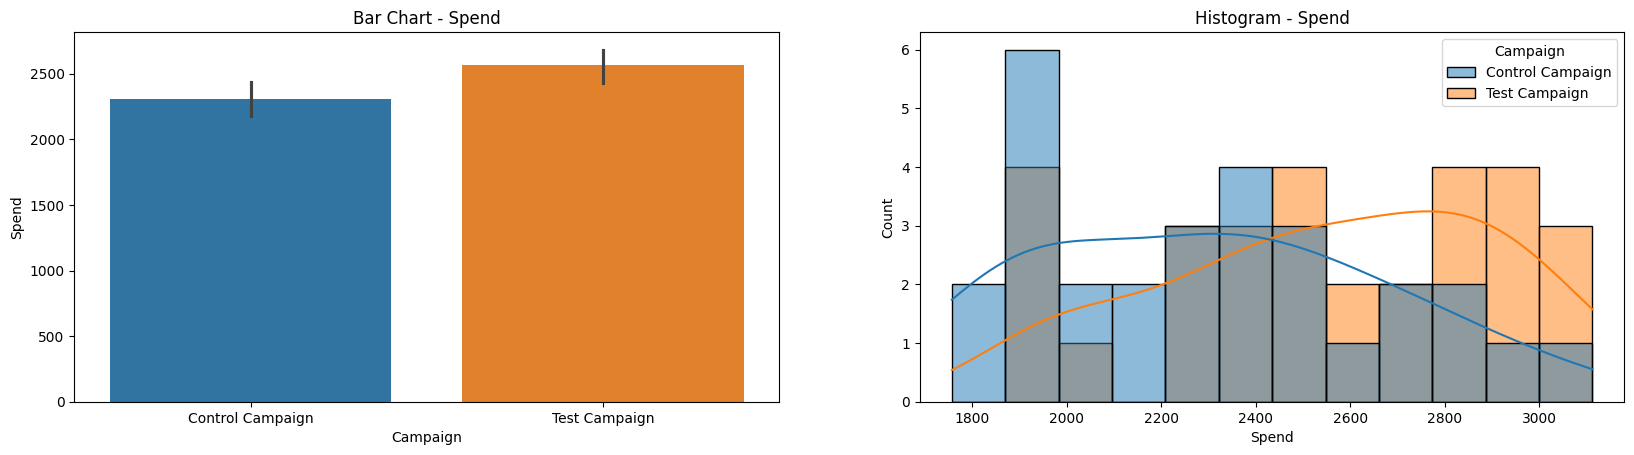

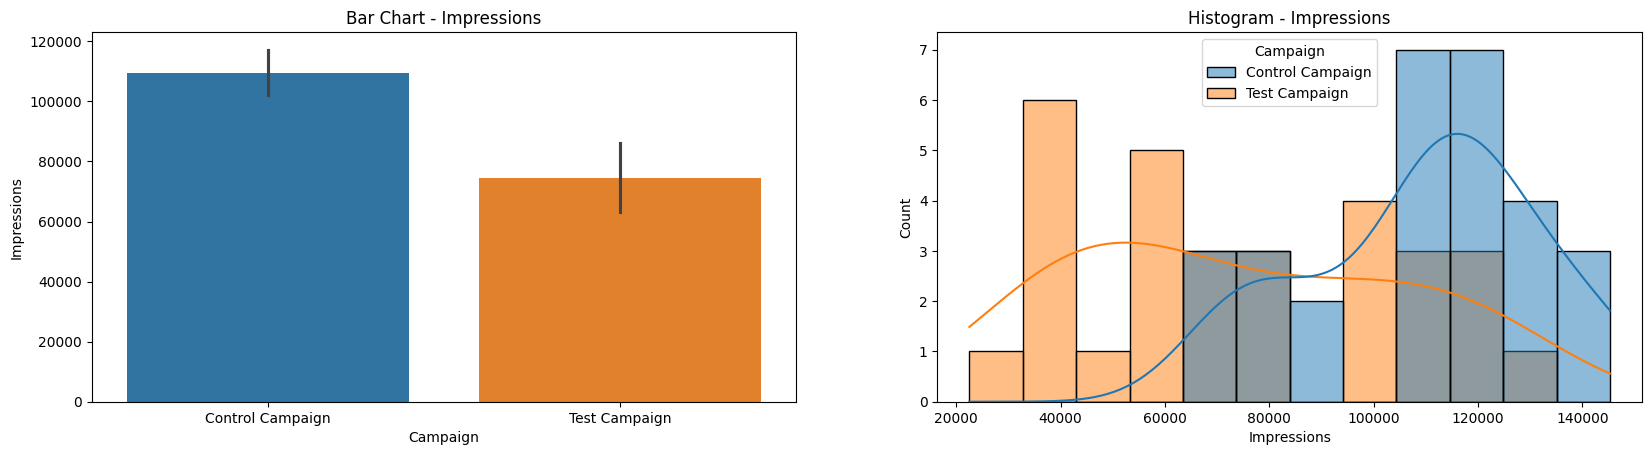

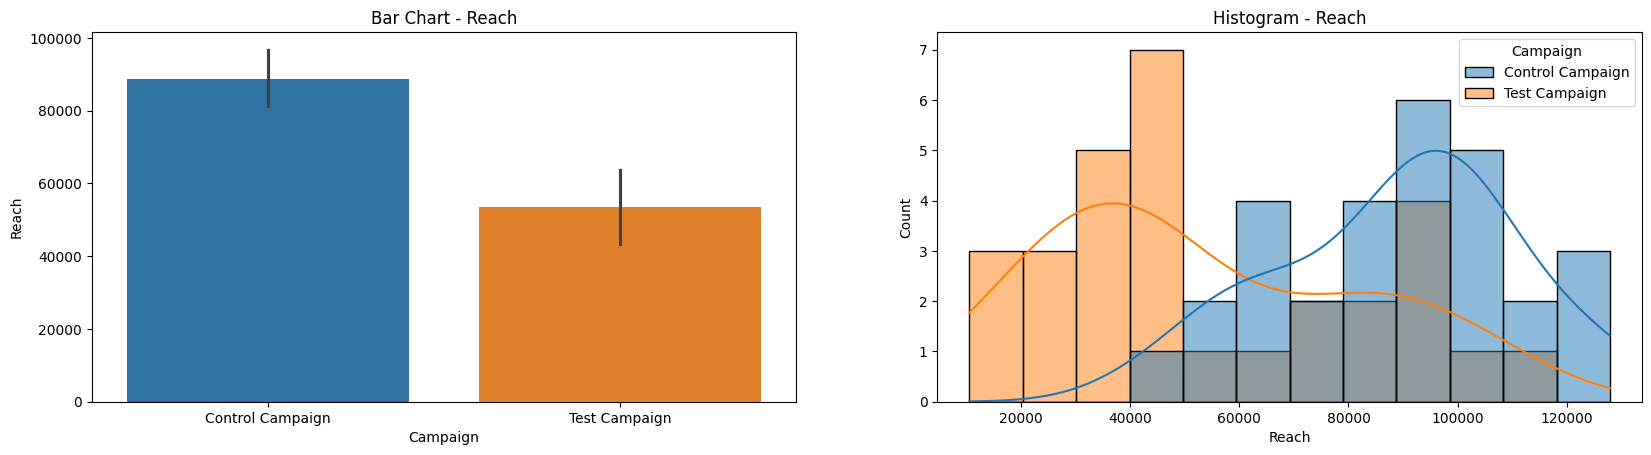

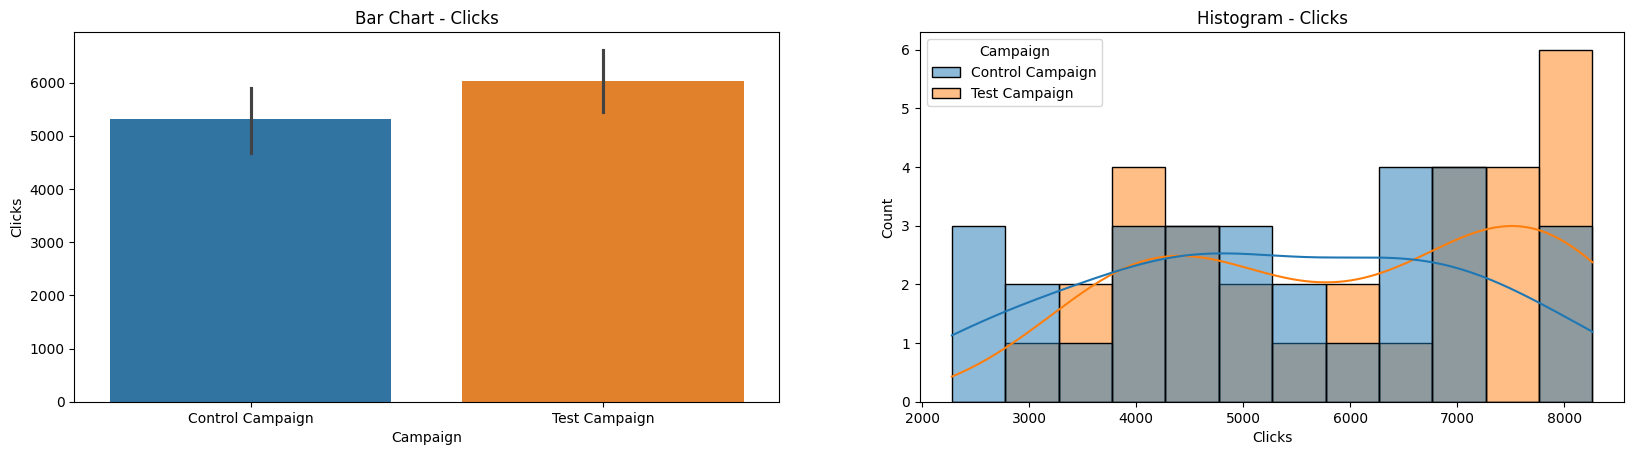

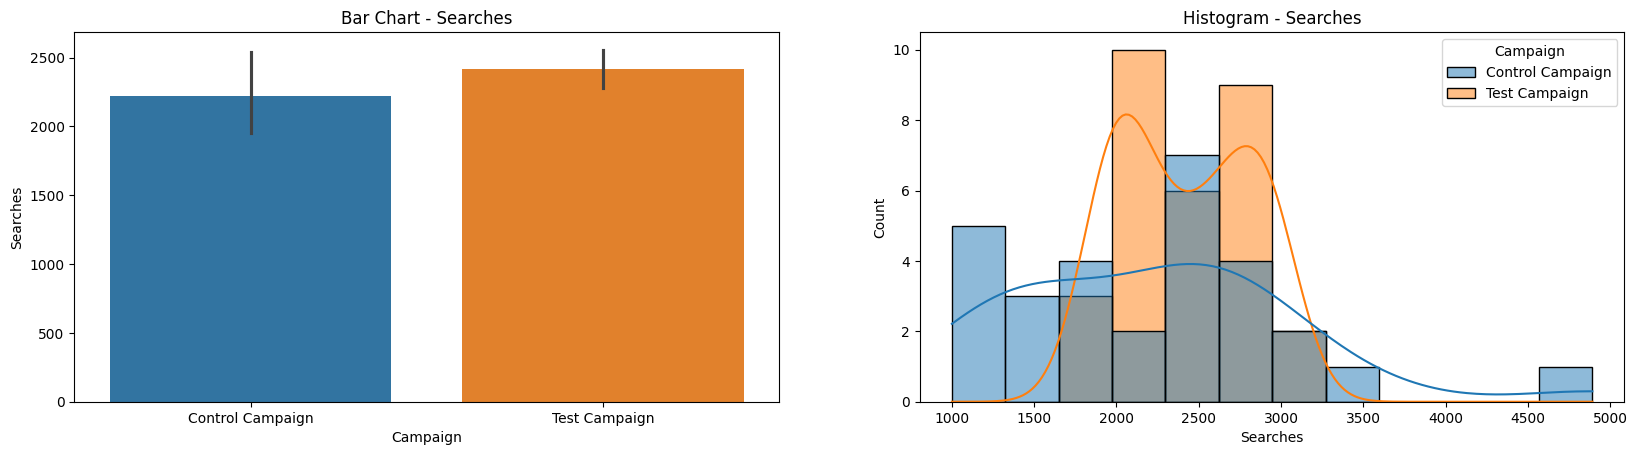

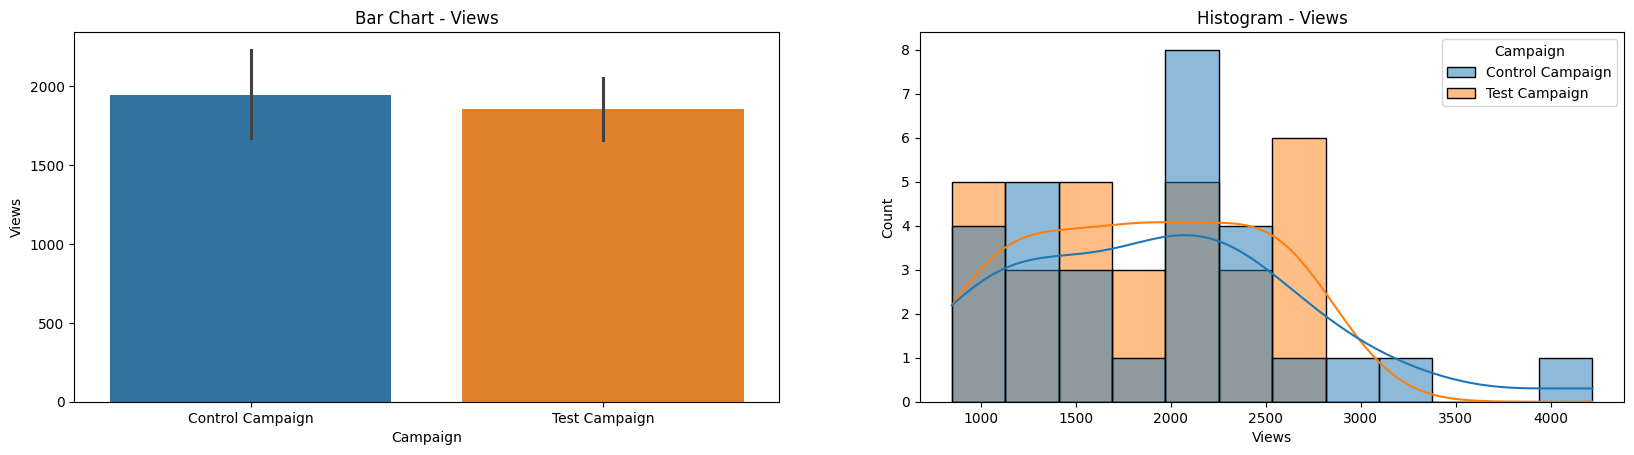

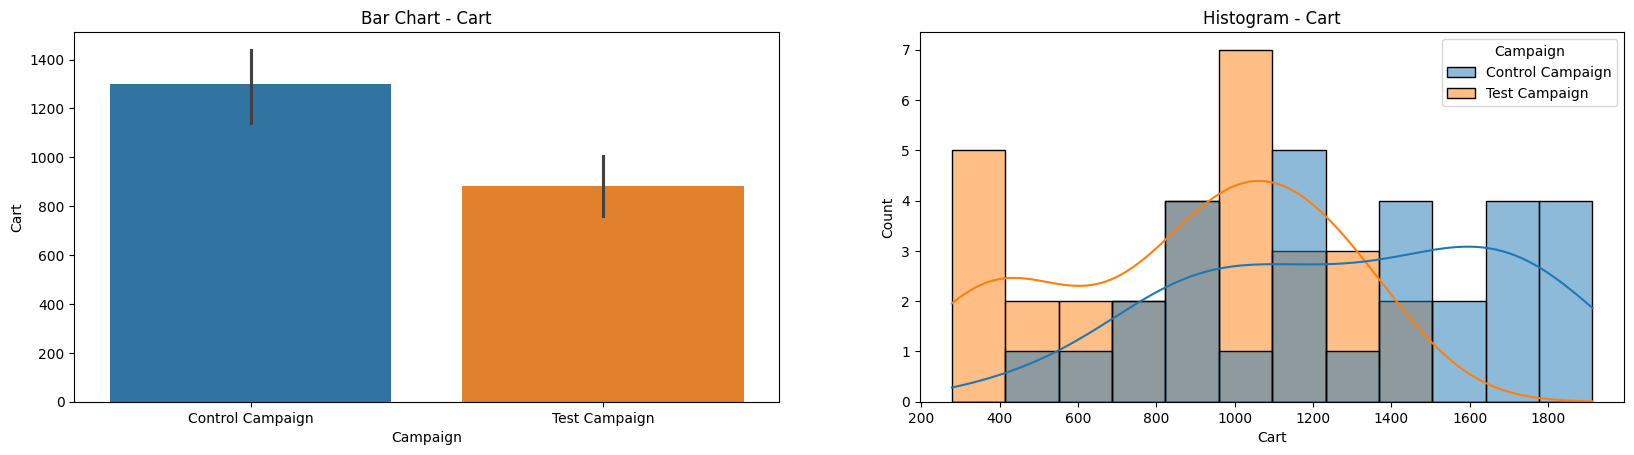

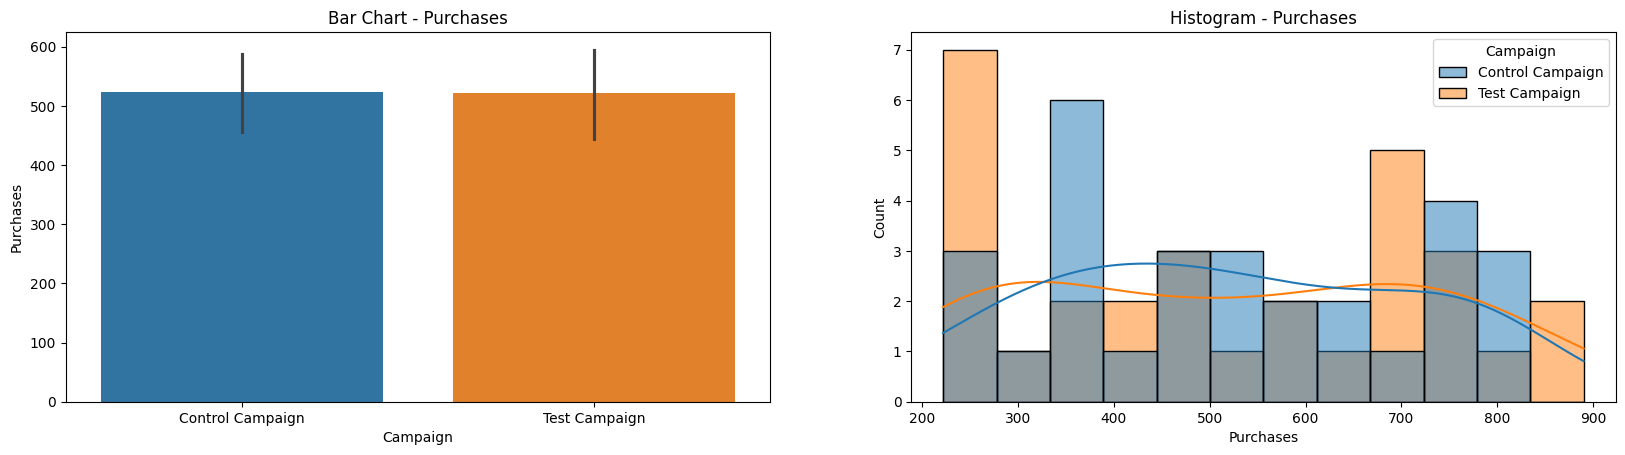

In [ ]:
# Create bar charts and histograms to visually compare the control and test campaign

# List of columns to exclude from for loop
columns_to_exclude = ['Day', 'Campaign', 'Date']

# Create charts using for loop
for column in ab_df.columns:
  if column not in columns_to_exclude:
    plt.figure().set_figwidth(20)
    plt.subplot(1, 2, 1)
    sns.barplot(x = "Campaign", y = column, data = ab_df, hue = "Campaign")
    plt.title(f"Bar Chart - {column}")

    plt.subplot(1, 2, 2)
    sns.histplot(data = ab_df, x = column, hue = "Campaign", kde = True, bins = 12)
    plt.title(f"Histogram - {column}")

    plt.show()

In [ ]:
# Print descriptive stats for each column based on campaign

# Group by campaign
grouped = ab_df.groupby("Campaign")

# List of columns to exclude from for loop
columns_to_exclude = ['Day', 'Campaign', 'Date']

# Create for loop
for column in ab_df.columns:
  if column not in columns_to_exclude:
    for group_name, group_data in grouped:
      print(f'{column} stats for {group_name}:')
      print(group_data[column].describe())
      print("\n")

Spend stats for Control Campaign:
count      29.000000
mean     2304.068966
std       363.534822
min      1757.000000
25%      1962.000000
50%      2319.000000
75%      2544.000000
max      3083.000000
Name: Spend, dtype: float64


Spend stats for Test Campaign:
count      30.000000
mean     2563.066667
std       348.687681
min      1968.000000
25%      2324.500000
50%      2584.000000
75%      2836.250000
max      3112.000000
Name: Spend, dtype: float64


Impressions stats for Control Campaign:
count        29.000000
mean     109559.758621
std       21688.922908
min       71274.000000
25%       92029.000000
50%      113430.000000
75%      121332.000000
max      145248.000000
Name: Impressions, dtype: float64


Impressions stats for Test Campaign:
count        30.000000
mean      74584.800000
std       32121.377422
min       22521.000000
25%       47541.250000
50%       68853.500000
75%       99500.000000
max      133771.000000
Name: Impressions, dtype: float64


Reach stats for Contro

**Day of Week Analysis**

In [ ]:
ab_df.columns

Index(['Campaign', 'Date', 'Spend', 'Impressions', 'Reach', 'Clicks',
       'Searches', 'Views', 'Cart', 'Purchases', 'Day'],
      dtype='object')

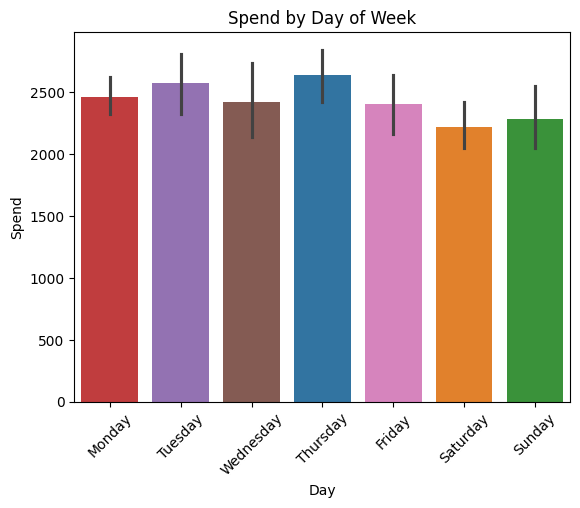

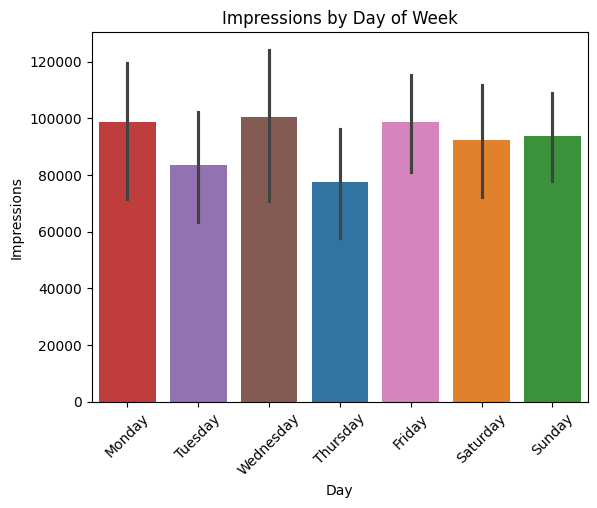

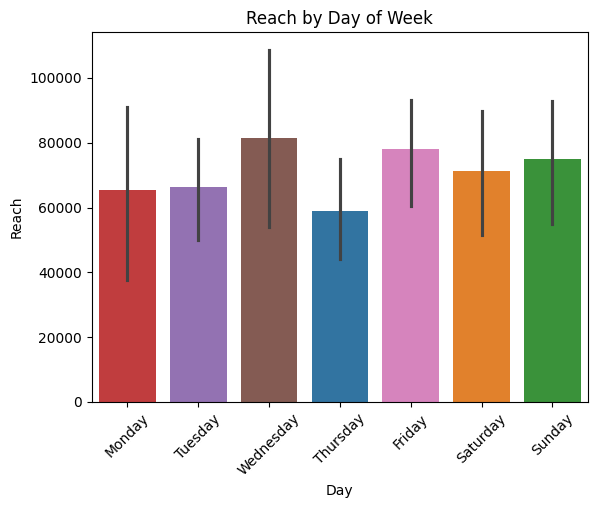

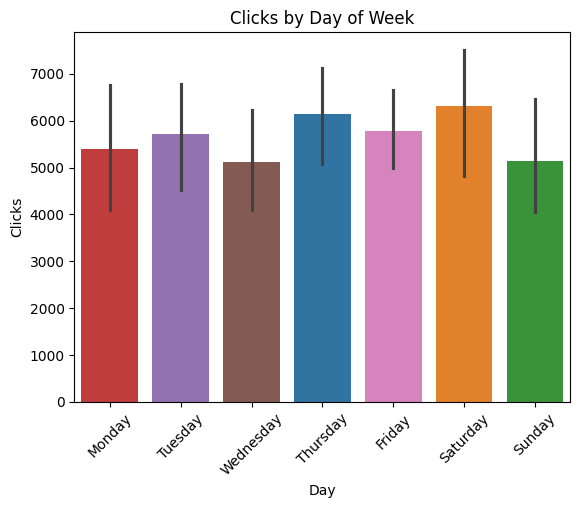

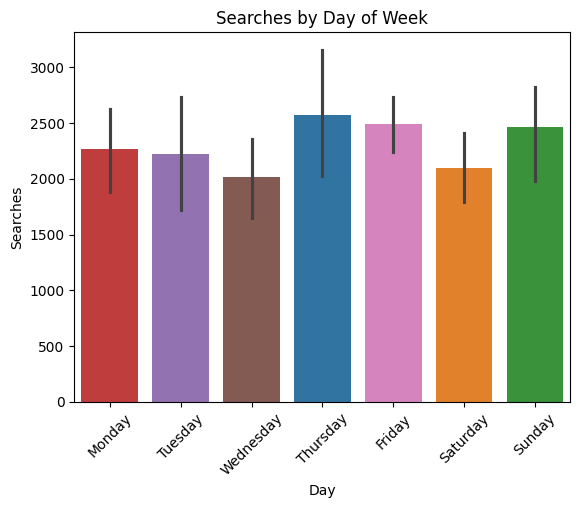

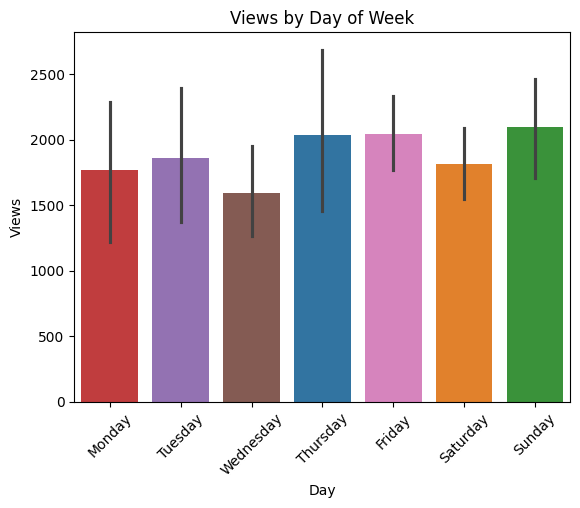

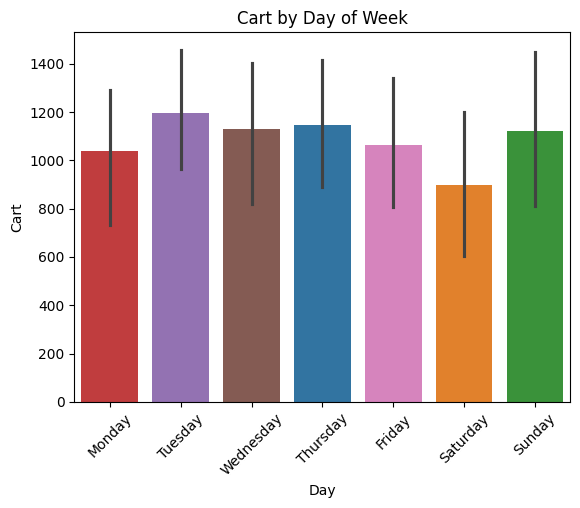

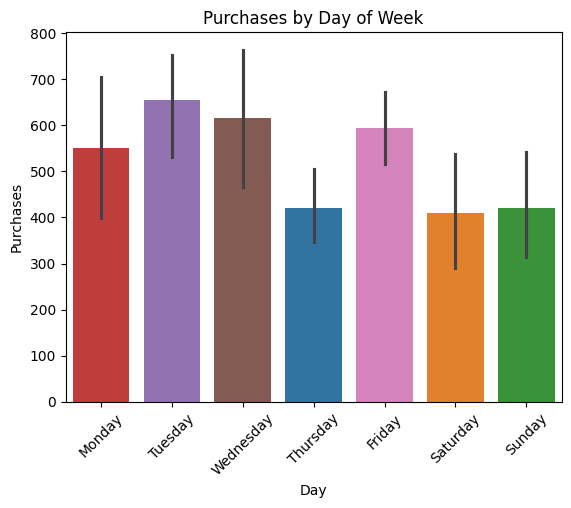

In [ ]:
# Create charts using for loop
columns_to_exclude = ["Campaign", "Date", "Day"]

days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for column in ab_df.columns:
  if column not in columns_to_exclude:
    sns.barplot(data = ab_df, x = "Day", y = column, hue = "Day", order = days)
    plt.title(f"{column} by Day of Week")
    plt.xticks(rotation = 45)
    plt.show()

**Statistical Analyses**

In [ ]:
ab_df.columns

Index(['Campaign', 'Date', 'Spend', 'Impressions', 'Reach', 'Clicks',
       'Searches', 'Views', 'Cart', 'Purchases', 'Day'],
      dtype='object')

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind

# Test for normailty using the Shapiro-Wilk test
shapiro_stat_control, shapiro_p_value_control = shapiro(ab_df[ab_df["Campaign"] == "Control Campaign"]["Spend"])
shapiro_stat_test, shapiro_p_value_test = shapiro(ab_df[ab_df["Campaign"] == "Test Campaign"]["Spend"])

print(f"Shapiro-Wilk test for normality (Control Group): p-value = {shapiro_p_value_control}")
print(f"Shapiro-Wilk test for normality (Test Group): p-value = {shapiro_p_value_test}")

# Check for equal variances using Levene's test
levene_stat, levene_p_value = levene(ab_df[ab_df["Campaign"] == "Control Campaign"]["Spend"], ab_df[ab_df["Campaign"] == "Test Campaign"]["Spend"])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-Wilk test for normality (Control Group): p-value = 0.3692897856235504
Shapiro-Wilk test for normality (Test Group): p-value = 0.11714765429496765
Levene's test for equality of variances: p-value = 0.8975585514162038


With a confidence interval of 95% and an alpha value of 0.05, the two distributions are normal with equal variance.

In [ ]:
# Use a independent two sample t-test to test if the two campaigns are significantly different for the Spend category

t_stat, t_p_value = ttest_ind(ab_df[ab_df["Campaign"] == "Control Campaign"]["Spend"], ab_df[ab_df["Campaign"] == "Test Campaign"]["Spend"])
print(f"Indpendent two-sample t-test: p-value = {t_p_value}")

alpha = 0.05
if t_p_value < alpha:
  print("\nThe two campaigns are significantly different across the Spend category, therefore, the ad campaign was successful in generating more revenue.")

Indpendent two-sample t-test: p-value = 0.007093062303374369

The two campaigns are significantly different in the amount of money genereated, therefore, the ad campaign is working.


In [ ]:
ab_df["Day"].value_counts()

Day
Thursday     10
Friday       10
Saturday      8
Sunday        8
Tuesday       8
Wednesday     8
Monday        7
Name: count, dtype: int64

In [ ]:
# Perform ANOVA test to test if day of week had a significant impact on the campaign for the Spend category
from scipy.stats import f_oneway

days = ab_df["Day"].unique()

# Use for loop to perform ANOVA for each day within each campaign group
for day in days:
  control_spend = ab_df[(ab_df["Day"] == day) & (ab_df["Campaign"] == "Control Campaign")]["Spend"]
  test_spend = ab_df[(ab_df["Day"] == day) & (ab_df["Campaign"] == "Test Campaign")]["Spend"]
  print(f"ANOVA for {day}")
  f_stat, p_value = f_oneway(control_spend, test_spend)
  print("F-statistic: ", f_stat)
  print("p-value: ",p_value)
  print()

ANOVA for Thursday
F-statistic:  3.4164055371114617
p-value:  0.10173358500248583

ANOVA for Saturday
F-statistic:  0.6047297663069849
p-value:  0.46632570870759477

ANOVA for Sunday
F-statistic:  3.1404709393598083
p-value:  0.12674852288704472

ANOVA for Monday
F-statistic:  0.5597024369492926
p-value:  0.48805468466151186

ANOVA for Tuesday
F-statistic:  0.15305413025521736
p-value:  0.7091488473481002

ANOVA for Wednesday
F-statistic:  3.8865837032945834
p-value:  0.09615782027488752

ANOVA for Friday
F-statistic:  0.9420229477182166
p-value:  0.3601839666985538



Using a confidence interval of 95% and an alpha value of 0.05, the day of the week was not significant across the spend category between the two campaign groups.